In [13]:
import pandas as pd

In [16]:
data = pd.read_csv('C:/Users/aumpa/Documents/ML/batwebs/Data Cleaning/smartphones.csv')

In [18]:
# Display basic info about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1019 non-null   object 
 1   price      1020 non-null   object 
 2   rating     879 non-null    float64
 3   sim        1020 non-null   object 
 4   processor  1020 non-null   object 
 5   ram        1020 non-null   object 
 6   battery    1020 non-null   object 
 7   display    1020 non-null   object 
 8   camera     1019 non-null   object 
 9   card       1013 non-null   object 
 10  os         1003 non-null   object 
dtypes: float64(1), object(10)
memory usage: 87.8+ KB
None


In [19]:
# Check the first few rows of the dataset
print(data.head())

                       model    price  rating  \
0              OnePlus 11 5G  ₹54,999    89.0   
1  OnePlus Nord CE 2 Lite 5G  ₹19,989    81.0   
2      Samsung Galaxy A14 5G  ₹16,499    75.0   
3       Motorola Moto G62 5G  ₹14,999    81.0   
4         Realme 10 Pro Plus  ₹24,999    82.0   

                                       sim  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
1       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
2       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
3       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
4       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   

                                         processor                        ram  \
0  Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor  12 GB RAM, 256 GB inbuilt   
1     Snapdragon 695, Octa Core, 2.2 GHz Processor   6 GB RAM, 128 GB inbuilt   
2        Exynos 1330, Octa Core, 2.4 GHz Processor    4 GB RAM, 64 GB inbuilt   
3    Snapdragon  695, Octa Core, 2.2 GHz Processor   6 GB RAM, 128 GB inbuilt   
4     Dimensity 1080, O

In [20]:
# Check for missing values in the dataset
print(data.isnull().sum())

model          1
price          0
rating       141
sim            0
processor      0
ram            0
battery        0
display        0
camera         1
card           7
os            17
dtype: int64


In [22]:
# Select numeric columns
numeric_columns = data.select_dtypes(include='number').columns

# Fill missing values in numeric columns with their respective means
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())


In [23]:
# Check for missing values in the dataset
print(data.isnull().sum())

model         1
price         0
rating        0
sim           0
processor     0
ram           0
battery       0
display       0
camera        1
card          7
os           17
dtype: int64


In [40]:
from sklearn.preprocessing import LabelEncoder

# Separate string and float columns
string_columns = data.select_dtypes(include='object').columns
float_columns = data.select_dtypes(include='float').columns

# Encode string columns using LabelEncoder
label_encoder = LabelEncoder()
for col in string_columns:
    if data[col].nunique() <= 50:  # Applying label encoding for categorical columns with <= 50 unique values
        data[col] = label_encoder.fit_transform(data[col])

# Combine string and float columns
selected_columns = list(string_columns) + list(float_columns)

# Compute correlation between string and float columns
correlation_matrix = data[selected_columns].corr()

# Display correlation matrix
print(correlation_matrix)


           model  price  rating  sim  processor  ram  battery  display  \
model        NaN    NaN     NaN  NaN        NaN  NaN      NaN      NaN   
price        NaN    NaN     NaN  NaN        NaN  NaN      NaN      NaN   
rating       NaN    NaN     1.0  NaN        NaN  NaN      NaN      NaN   
sim          NaN    NaN     NaN  NaN        NaN  NaN      NaN      NaN   
processor    NaN    NaN     NaN  NaN        NaN  NaN      NaN      NaN   
ram          NaN    NaN     NaN  NaN        NaN  NaN      NaN      NaN   
battery      NaN    NaN     NaN  NaN        NaN  NaN      NaN      NaN   
display      NaN    NaN     NaN  NaN        NaN  NaN      NaN      NaN   
camera       NaN    NaN     NaN  NaN        NaN  NaN      NaN      NaN   
card         NaN    NaN     NaN  NaN        NaN  NaN      NaN      NaN   
os           NaN    NaN     NaN  NaN        NaN  NaN      NaN      NaN   

           camera  card  os  
model         NaN   NaN NaN  
price         NaN   NaN NaN  
rating        NaN   N

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_columns = data.select_dtypes(include='number')

# Calculate correlation matrix for numeric columns only
corr_matrix = numeric_columns.corr()

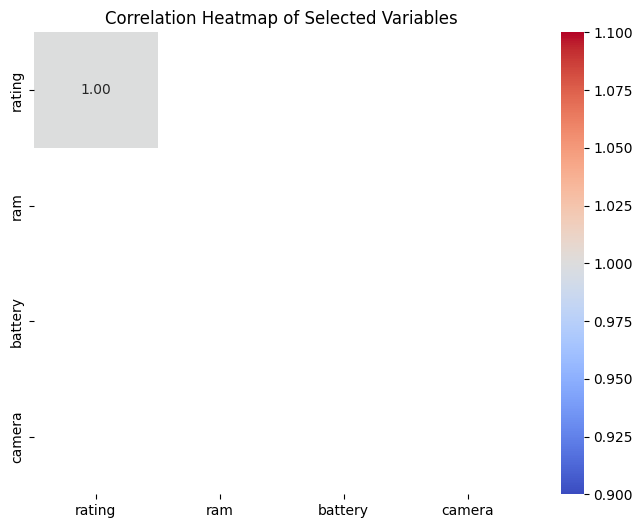

In [42]:
# Select specific columns for correlation analysis
selected_columns = ['rating', 'ram', 'battery', 'camera']  

# Subset the data to include only the selected columns
selected_data = data[selected_columns]

# Compute correlation matrix
correlation_matrix = selected_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Selected Variables')
plt.show()

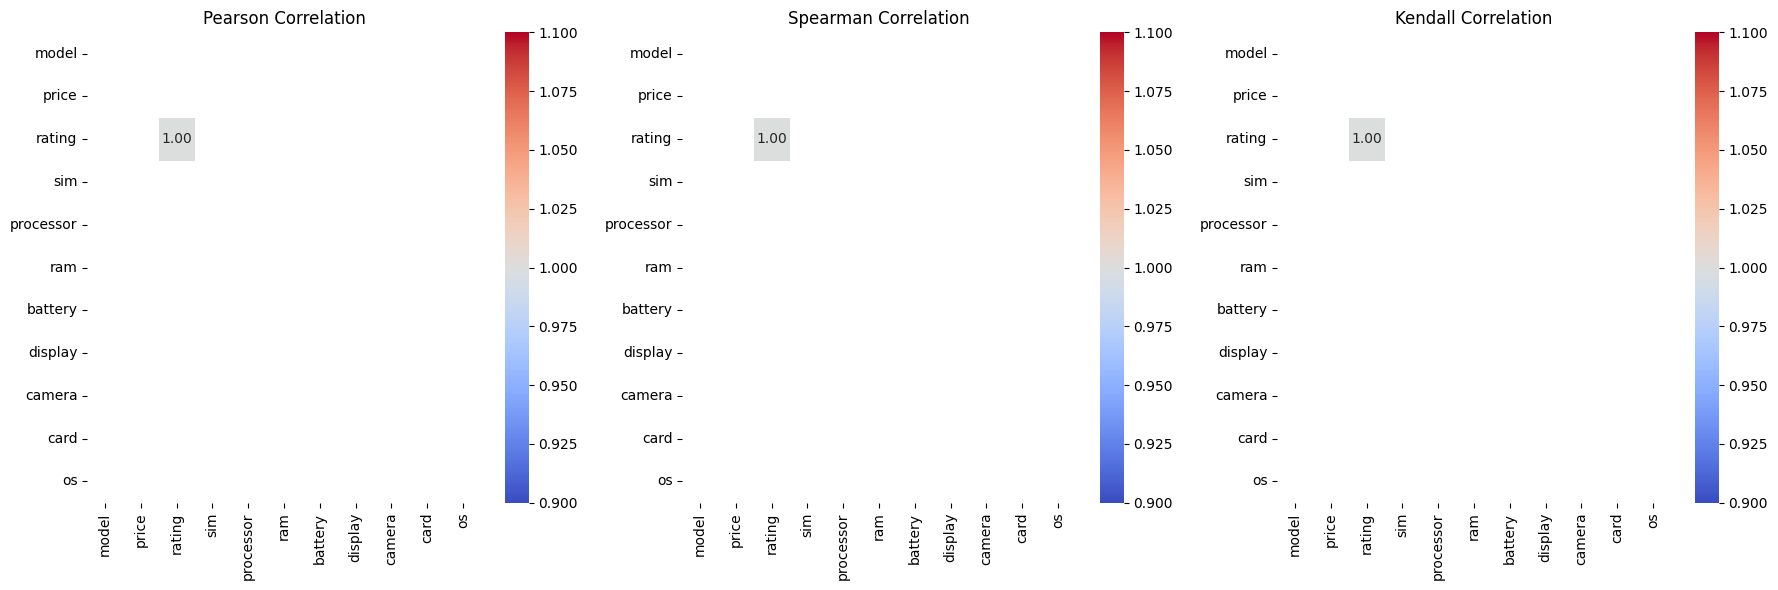

In [43]:
# Identify numeric columns
numeric_columns = data.select_dtypes(include='number').columns

# Filter the DataFrame to include only numeric columns
numeric_data = data[numeric_columns]

# Compute different correlation methods
pearson_corr = numeric_data.corr(method='pearson')
spearman_corr = numeric_data.corr(method='spearman')
kendall_corr = numeric_data.corr(method='kendall')

# Set up the subplots for correlation heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Pearson correlation heatmap
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0])
axes[0].set_title('Pearson Correlation')

# Spearman correlation heatmap
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1])
axes[1].set_title('Spearman Correlation')

# Kendall correlation heatmap
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[2])
axes[2].set_title('Kendall Correlation')

plt.tight_layout()
plt.show()

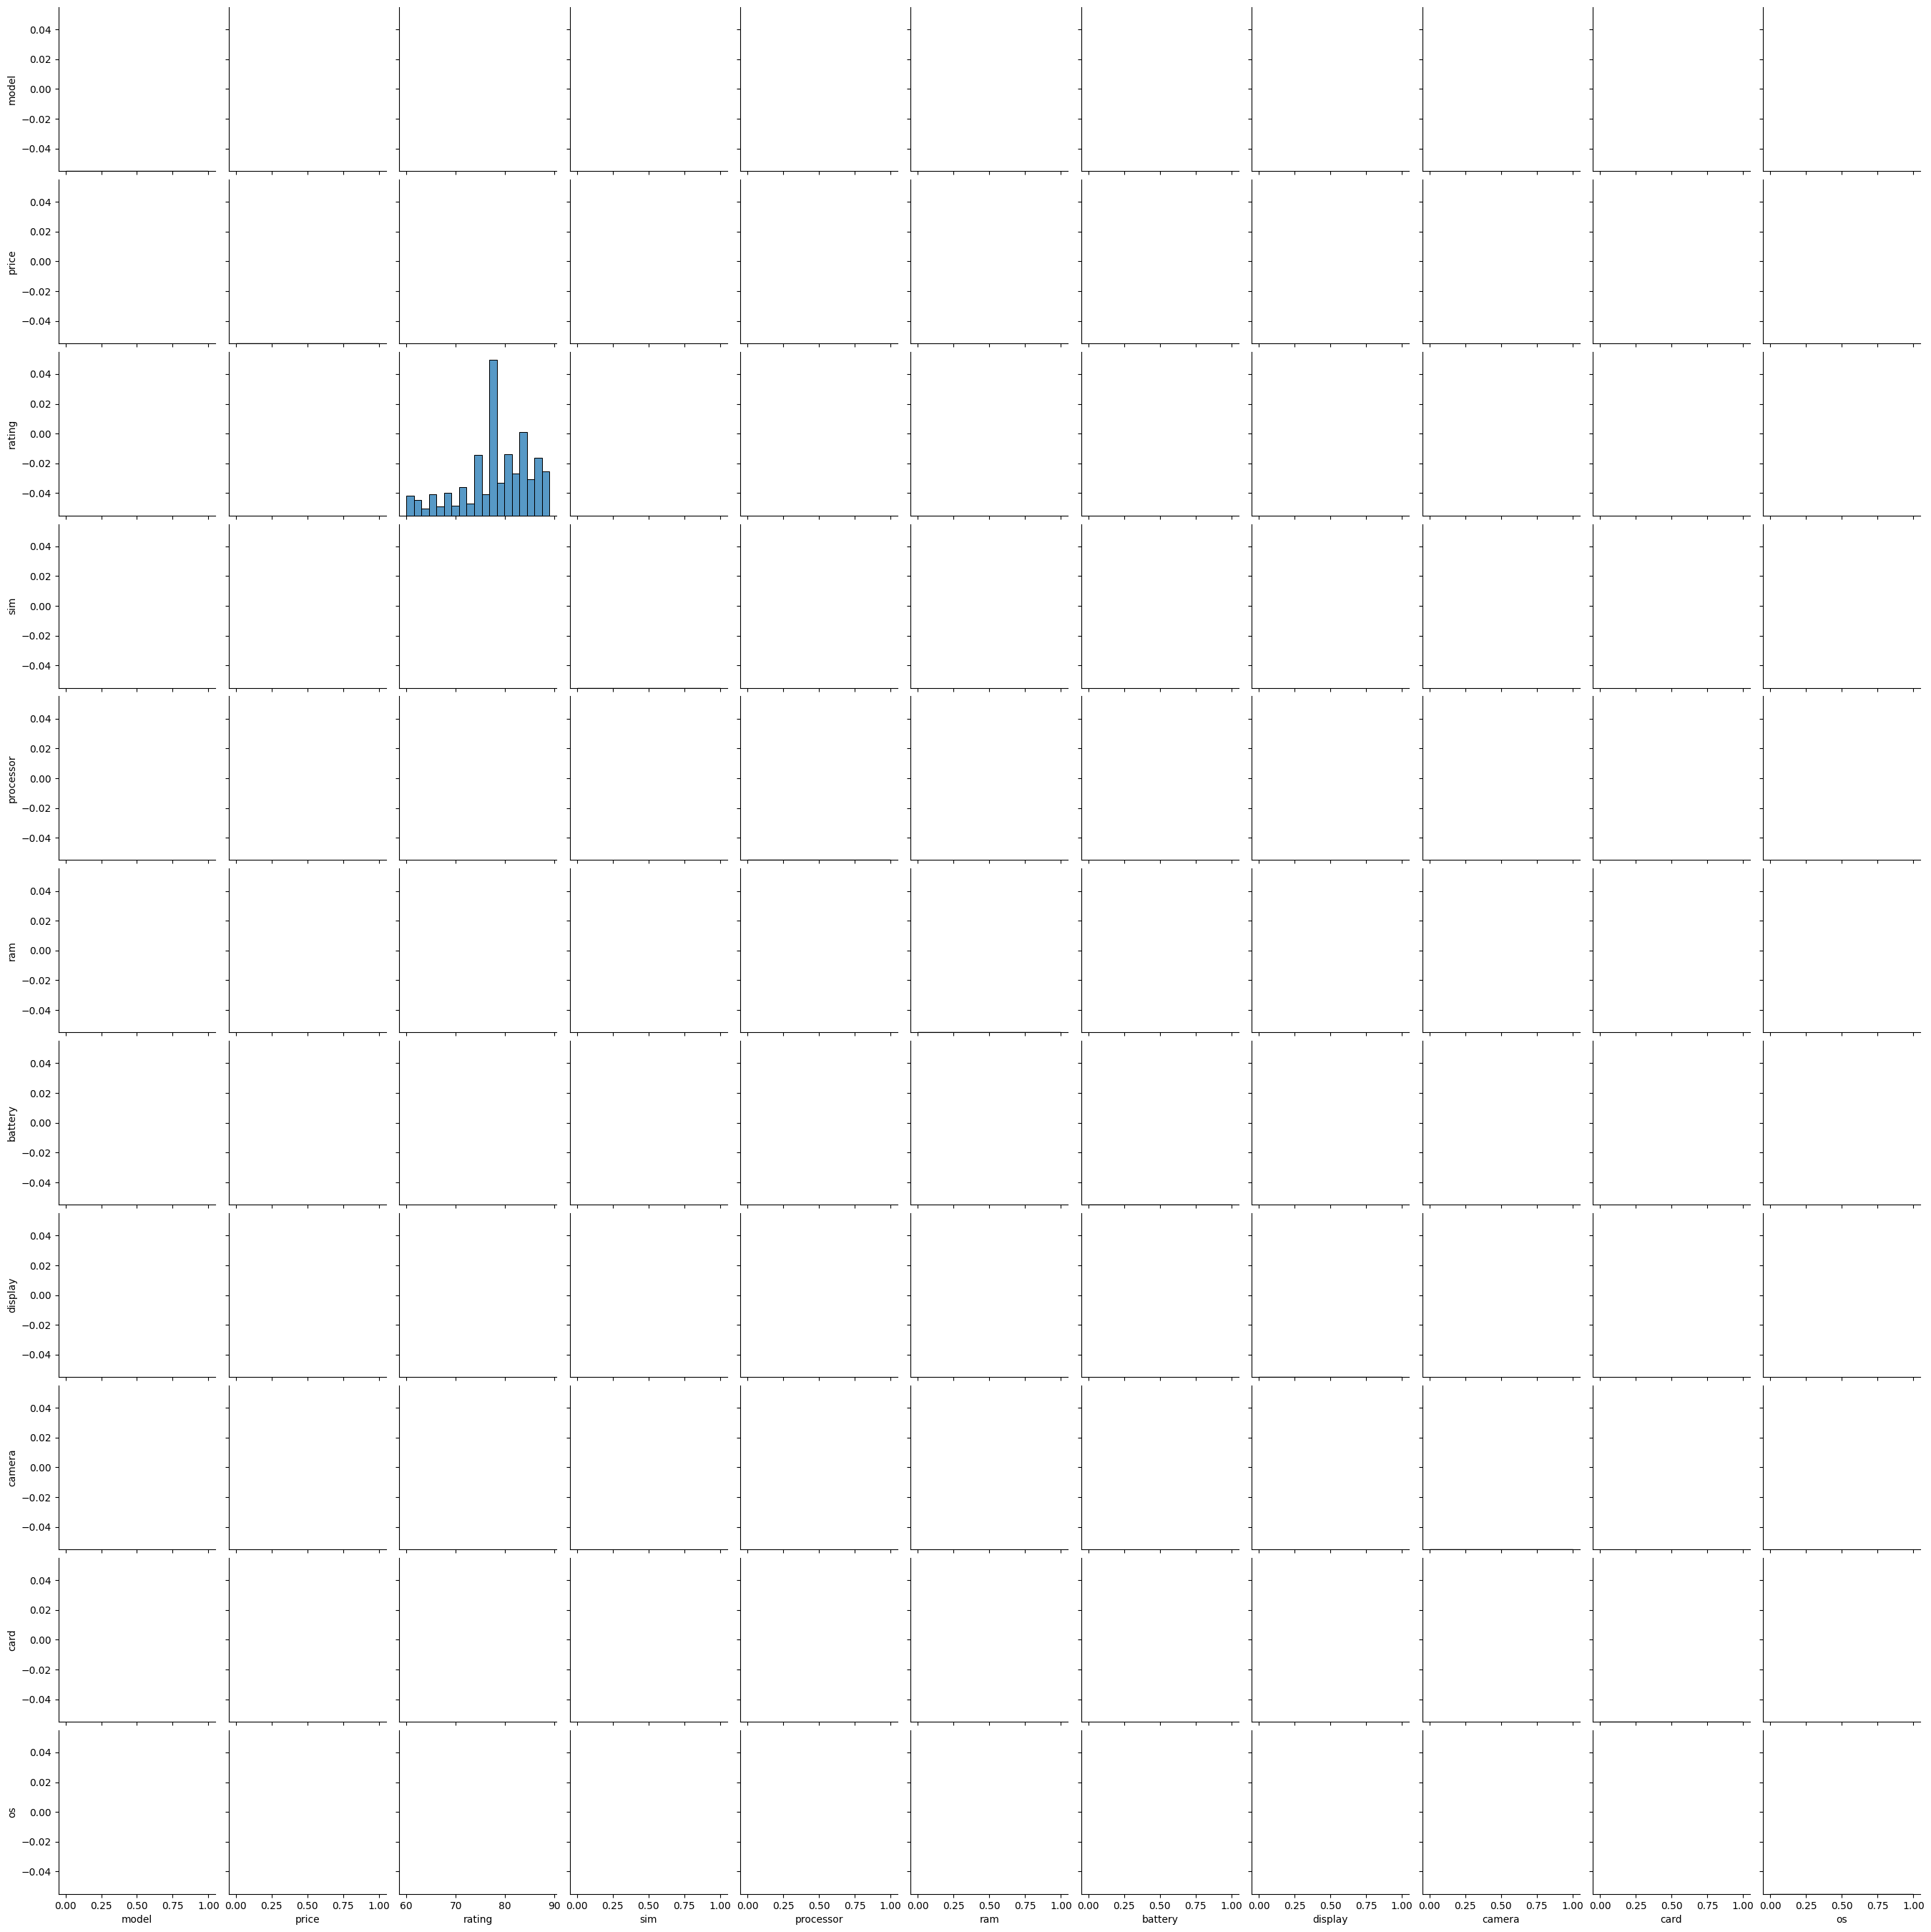

In [44]:
# Exploratory Data Analysis (EDA)
sns.pairplot(data)
plt.show()